<a href="https://colab.research.google.com/github/ilhamfahmi11/Analisis-Text-Data-Instagram-X/blob/main/Scraping_Instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><u>PROSES PENGAMBILAN DATA INSTAGRAM</u></h1>

In [ ]:
# @title install library Instagrapi
!pip install instagrapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for instagrapi: filename=instagrapi-2.1.5-py3-none-any.whl size=117844 sha256=b40d90d1e433a0f4be9c9e72ae67062ddba80bf744780c52c728d78b30f7bbad
  Stored in directory: /root/.cache/pip/wheels/d3/ed/3f/aece4401e293d5813dd2a721b660cbd8d2e8dc123f1df68ecc
Successfully built instagrapi


In [ ]:
# @title Scraping Data Komentar Instagram

from instagrapi import Client
from getpass import getpass
import pandas as pd
import time

# Inisialisasi klien instagrapi
cl = Client()

# Login manual
username = input("Masukkan username Instagram Anda: ")
password = getpass("Masukkan password Instagram Anda: ")
try:
    cl.login(username, password)
    print("Login berhasil!")
except Exception as e:
    print(f"Gagal login: {e}")
    exit()

# Input shortcode dari pengguna
shortcode = input("Masukkan shortcode postingan Instagram: ")
print(f"Memproses shortcode: {shortcode} ...")

# Inisialisasi
max_komentar = 530
batch_size = 50
batch_delay = 30  # detik
jumlah_diambil = 0
comments = []

try:
    media_id = cl.media_pk_from_code(shortcode)

    while jumlah_diambil < max_komentar:
        batch = cl.media_comments(media_id, amount=batch_size)
        if not batch:
            break
        comments.extend(batch)
        jumlah_diambil += len(batch)
        print(f"Jumlah komentar diambil sejauh ini: {jumlah_diambil}")
        time.sleep(batch_delay)

except Exception as e:
    print(f"Error pada shortcode {shortcode}: {e}")

# Simpan ke CSV
if comments:
    data = [{'shortcode': shortcode, 'username': c.user.username, 'comment': c.text} for c in comments]
    df = pd.DataFrame(data)
    df.to_csv('komentar_instagram7.csv', index=False)
    print("Data komentar berhasil disimpan dalam 'komentar_instagram7.csv'")
else:
    print("Tidak ada komentar yang berhasil diambil.")

In [ ]:
# @title menggabungkan semua data
import pandas as pd

# Daftar semua file yang ingin digabungkan
all_files = [
    "komentar_instagram1.csv",
    "komentar_instagram2.csv",
    "komentar_instagram3.csv",
    "komentar_instagram4.csv",
    "komentar_instagram5.csv",
    "komentar_instagram6.csv",
    "komentar_instagram7.csv"
]

# List untuk menampung data dari setiap file
dfs = []

# Baca dan tambahkan tiap file ke dalam list
for file in all_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Gabungkan semua DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Simpan hasil gabungan ke file baru
merged_df.to_csv("komentar_instagram_all.csv", index=False)

print("Semua file berhasil digabungkan ke dalam komentar_instagram_all.csv")


Semua file berhasil digabungkan ke dalam komentar_instagram_all.csv


In [ ]:
# @title Membaca Data File CSV
import pandas as pd

df = pd.read_csv("komentar_instagram_all.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shortcode  5989 non-null   object
 1   username   5989 non-null   object
 2   comment    5987 non-null   object
dtypes: object(3)
memory usage: 140.5+ KB


In [ ]:
df = df.dropna() # menghapus data kosong / NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5987 entries, 0 to 5988
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shortcode  5987 non-null   object
 1   username   5987 non-null   object
 2   comment    5987 non-null   object
dtypes: object(3)
memory usage: 187.1+ KB


In [ ]:
# @title Hapus Data Duplikat
df.drop_duplicates(subset ="comment", keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1532 entries, 0 to 5488
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shortcode  1532 non-null   object
 1   username   1532 non-null   object
 2   comment    1532 non-null   object
dtypes: object(3)
memory usage: 47.9+ KB



<h1><u>PROSES PREPROCESSING DATA</u></h1>


In [ ]:
# @title Data Cleaning
# Proses Data Cleaning
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # geometric shapes extended
            u"\U0001F800-\U0001F8FF"  # supplemental arrows
            u"\U0001F900-\U0001F9FF"  # supplemental symbols & pictographs
            u"\U0001FA00-\U0001FA6F"  # chess symbols
            u"\U0001FA70-\U0001FAFF"  # symbols & pictographs extends
            u"\U0001F004-\U0001F0CF"  # additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        return re.sub(r'[^a-zA-Z0-9\s]', '', tweet)  # menghapus semua simbol
    else:
        return tweet

# Fungsi untuk menghapus angka
def remove_number(tweet):
    if tweet is not None and isinstance(tweet, str):
        return re.sub(r'\d', '', tweet)  # menghapus semua angka
    else:
        return tweet

# Fungsi untuk menghapus username
def remove_username(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'@[^\s]+', '', text)
    else:
        return text

# Penerapan fungsi cleaning
df['clean_text'] = df['comment'].apply(lambda x: remove_URL(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_username(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_html(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_emoji(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_symbols(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_number(x))

# Hapus kolom 'shortcode' dan 'username'
df = df.drop(columns=['shortcode', 'username'])

# Tampilkan Hasil Akhir
print("Hasil clean_text instagram :")

# Menampilkan hasil
df.head(5)


Hasil clean_text instagram :


,comment,clean_text
0,Info loker pertamina,Info loker pertamina
1,Mau ngeluh takut diceramahi netizen😂,Mau ngeluh takut diceramahi netizen
2,"Emang pertalite masuk BBM bersubsidi? 😂 Coba, ...",Emang pertalite masuk BBM bersubsidi Coba bla...
3,Bagus! Biar BBM Subsidi makin ga salah sasaran...,Bagus Biar BBM Subsidi makin ga salah sasaran ...
4,Di daerah2 malah isi jergen besar dan dijadiin...,Di daerah malah isi jergen besar dan dijadiin ...


In [ ]:
# @title Case Folding
# Proses Case Folding

def case_folding(text):
    if isinstance(text, str):       # Mengecek apakah input adalah string
      lowercase_text = text.lower() # Mengubah semua huruf dalam string menjadi huruf kecil
      return lowercase_text         # Mengembalikan hasil teks yang sudah diubah menjadi huruf kecil
    else:
        return text # Jika input bukan string (misalnya NaN), kembalikan nilai aslinya tanpa perubahan

df['case_folding'] = df['clean_text'].apply(case_folding)

# Tampilkan Hasil Akhir
print("Hasil case_folding instagram :")

# Tampilkan DataFrame untuk melihat hasilnya beserta compound_score dan sentimen
df[['clean_text', 'case_folding']].head(5)

Hasil case_folding instagram :


,clean_text,case_folding
0,Info loker pertamina,info loker pertamina
1,Mau ngeluh takut diceramahi netizen,mau ngeluh takut diceramahi netizen
2,Emang pertalite masuk BBM bersubsidi Coba bla...,emang pertalite masuk bbm bersubsidi coba bla...
3,Bagus Biar BBM Subsidi makin ga salah sasaran ...,bagus biar bbm subsidi makin ga salah sasaran ...
4,Di daerah malah isi jergen besar dan dijadiin ...,di daerah malah isi jergen besar dan dijadiin ...


In [ ]:
# @title Normalization
# Proses Normalization

import pandas as pd

# Fungsi Normalisasi: Mengganti kata tidak baku dengan kata baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):  # Pastikan input adalah string
        words = text.split()   # Pisahkan kata per kata
        replaced_words = []    # List untuk kata hasil penggantian

        for word in words:
            # Jika kata ada dalam kamus, ganti dengan kata baku
            if word in kamus_tidak_baku:
                replaced_words.append(kamus_tidak_baku[word])
            else:  # Jika tidak ada di kamus, gunakan kata asli
                replaced_words.append(word)

        replaced_text = ' '.join(replaced_words)  # Gabungkan kembali menjadi kalimat
        return replaced_text
    return text  # Jika bukan string, kembalikan teks apa adanya

# 1. Membaca Kamus Kata Tidak Baku
# Path file kamus kata tidak baku
kamus_data = pd.read_csv("kamuskatabaku.csv")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

# 2. Proses Normalisasi
# Terapkan normalisasi pada kolom `case_folding` dari DataFrame `df`
df['hasil_normalisasi'] = df['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku))

# 3. Tampilkan Hasil Akhir
print("Hasil Normalisasi instagram :")
# Tampilkan DataFrame untuk melihat hasilnya
df[['case_folding', 'hasil_normalisasi']].head(5)


Hasil Normalisasi instagram :


,case_folding,hasil_normalisasi
0,info loker pertamina,info loker pertamina
1,mau ngeluh takut diceramahi netizen,mau ngeluh takut diceramahi netizen
2,emang pertalite masuk bbm bersubsidi coba bla...,memang pertalite masuk bbm bersubsidi coba bla...
3,bagus biar bbm subsidi makin ga salah sasaran ...,bagus biar bbm subsidi makin tidak salah sasar...
4,di daerah malah isi jergen besar dan dijadiin ...,di daerah malah isi jergen besar dan dijadikan...


In [ ]:
# @title Tokenizing
# (memecah teks menjadi kata-kata/token)
def tokenize(text):
    return str(text).split() # Memecah teks menjadi daftar kata berdasarkan spasi

df['hasil_normalisasi'] = df['hasil_normalisasi'].fillna('')
df['tokenize'] = df['hasil_normalisasi'].apply(tokenize)

# Tampilkan Hasil Akhir
print("Hasil Tokenize instagram :")
# Tampilkan DataFrame untuk melihat hasilnya
df[['hasil_normalisasi', 'tokenize']].head(5)

Hasil Tokenize instagram :


,hasil_normalisasi,tokenize
0,info loker pertamina,"[info, loker, pertamina]"
1,mau ngeluh takut diceramahi netizen,"[mau, ngeluh, takut, diceramahi, netizen]"
2,memang pertalite masuk bbm bersubsidi coba bla...,"[memang, pertalite, masuk, bbm, bersubsidi, co..."
3,bagus biar bbm subsidi makin tidak salah sasar...,"[bagus, biar, bbm, subsidi, makin, tidak, sala..."
4,di daerah malah isi jergen besar dan dijadikan...,"[di, daerah, malah, isi, jergen, besar, dan, d..."


In [ ]:
# @title Inisialisasi Stopword Removal
# Proses Stopword Removal

from nltk.corpus import stopwords # Mengimpor modul stopwords dari NLTK
nltk.download('stopwords') # Mengunduh daftar stopwords
stop_words = stopwords.words('indonesian') # Mengambil daftar stopwords untuk bahasa Indonesia

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# @title Proses Stopword Removal
def remove_stopwords(text):
    return [word for word in text if word not in stop_words] # Hanya menyimpan kata yang tidak termasuk dalam stopwords

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
# Tampilkan Hasil Akhir
print("Hasil stopword_removal instagram :")
# Tampilkan DataFrame untuk melihat hasilnya
df[['tokenize', 'stopword_removal']].head(5)

Hasil stopword_removal instagram :


,tokenize,stopword_removal
0,"[info, loker, pertamina]","[info, loker, pertamina]"
1,"[mau, ngeluh, takut, diceramahi, netizen]","[ngeluh, takut, diceramahi, netizen]"
2,"[memang, pertalite, masuk, bbm, bersubsidi, co...","[pertalite, masuk, bbm, bersubsidi, coba, blak..."
3,"[bagus, biar, bbm, subsidi, makin, tidak, sala...","[bagus, biar, bbm, subsidi, salah, sasaran, su..."
4,"[di, daerah, malah, isi, jergen, besar, dan, d...","[daerah, isi, jergen, dijadikan, bisnis]"


In [ ]:
# @title Inisialisasi Steming
# Proses Stemming

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# @title Proses Steming
Factory = StemmerFactory()
stemmer = Factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))
print("Hasil steming_data instagram :")
# Tampilkan DataFrame untuk melihat hasilnya
df[['stopword_removal', 'steming_data']].head(5)

Hasil steming_data instagram :


,stopword_removal,steming_data
0,"[info, loker, pertamina]",info loker pertamina
1,"[ngeluh, takut, diceramahi, netizen]",ngeluh takut ceramah netizen
2,"[pertalite, masuk, bbm, bersubsidi, coba, blak...",pertalite masuk bbm subsidi coba blakblakan ma...
3,"[bagus, biar, bbm, subsidi, salah, sasaran, su...",bagus biar bbm subsidi salah sasar suka geli l...
4,"[daerah, isi, jergen, dijadikan, bisnis]",daerah isi jergen jadi bisnis


In [ ]:
# @title Menampilkan Informasi Struktur DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1532 entries, 0 to 5488
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comment            1532 non-null   object
 1   clean_text         1532 non-null   object
 2   case_folding       1532 non-null   object
 3   hasil_normalisasi  1532 non-null   object
 4   tokenize           1532 non-null   object
 5   stopword_removal   1532 non-null   object
 6   steming_data       1532 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB


In [ ]:
# Download hasil preprocessing ke csv
df.to_csv('hasil_preprocessing_data_instagram.csv', index=False, encoding='utf-8')

<h1><u>PROSES ANALISIS SENTIMEN</u></h1>


In [ ]:
!pip install vaderSentiment
!pip install googletrans==4.0.0-rc1

In [ ]:
# Import library NLTK (Natural Language Toolkit)
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import pandas as pd

df = pd.read_csv('hasil_preprocessing_data_instagram.csv')  # ganti nama file sesuai file kamu
df.head(5)

,comment,clean_text,case_folding,hasil_normalisasi,tokenize,stopword_removal,steming_data
0,Info loker pertamina,Info loker pertamina,info loker pertamina,info loker pertamina,"['info', 'loker', 'pertamina']","['info', 'loker', 'pertamina']",info loker pertamina
1,Mau ngeluh takut diceramahi netizen😂,Mau ngeluh takut diceramahi netizen,mau ngeluh takut diceramahi netizen,mau ngeluh takut diceramahi netizen,"['mau', 'ngeluh', 'takut', 'diceramahi', 'neti...","['ngeluh', 'takut', 'diceramahi', 'netizen']",ngeluh takut ceramah netizen
2,"Emang pertalite masuk BBM bersubsidi? 😂 Coba, ...",Emang pertalite masuk BBM bersubsidi Coba bla...,emang pertalite masuk bbm bersubsidi coba bla...,memang pertalite masuk bbm bersubsidi coba bla...,"['memang', 'pertalite', 'masuk', 'bbm', 'bersu...","['pertalite', 'masuk', 'bbm', 'bersubsidi', 'c...",pertalite masuk bbm subsidi coba blakblakan ma...
3,Bagus! Biar BBM Subsidi makin ga salah sasaran...,Bagus Biar BBM Subsidi makin ga salah sasaran ...,bagus biar bbm subsidi makin ga salah sasaran ...,bagus biar bbm subsidi makin tidak salah sasar...,"['bagus', 'biar', 'bbm', 'subsidi', 'makin', '...","['bagus', 'biar', 'bbm', 'subsidi', 'salah', '...",bagus biar bbm subsidi salah sasar suka geli l...
4,Di daerah2 malah isi jergen besar dan dijadiin...,Di daerah malah isi jergen besar dan dijadiin ...,di daerah malah isi jergen besar dan dijadiin ...,di daerah malah isi jergen besar dan dijadikan...,"['di', 'daerah', 'malah', 'isi', 'jergen', 'be...","['daerah', 'isi', 'jergen', 'dijadikan', 'bisn...",daerah isi jergen jadi bisnis


In [ ]:
# @title Translate Data
from googletrans import Translator

# Inisialisasi objek Translator
translator = Translator()

# Fungsi untuk menerjemahkan teks dan menjaga format huruf kecil
def translate_to_english(text):
    try:
        # Menerjemahkan teks ke dalam bahasa Inggris
        translated = translator.translate(text, src='id', dest='en')
        # Mengembalikan hasil terjemahan dalam huruf kecil
        return translated.text.lower()
    except Exception as e:
        return str(e)

# Terapkan penerjemahan pada data yang telah melalui proses stemming
df['translated_text'] = df['steming_data'].apply(lambda x: translate_to_english(x))

print("Hasil translated instagram :")
# Tampilkan DataFrame untuk melihat hasilnya
df[['steming_data', 'translated_text']].head(5)

Hasil translated instagram :


,steming_data,translated_text
0,info loker pertamina,pertamina locker info
1,ngeluh takut ceramah netizen,fear of netizens' lectures
2,pertalite masuk bbm subsidi coba blakblakan ma...,pertalite entering subsidized bbm try to be bl...
3,bagus biar bbm subsidi salah sasar suka geli l...,good so that the subsidized fuel is wrongly ti...
4,daerah isi jergen jadi bisnis,the area of ​​the contents of the jergen into ...


In [ ]:
import pandas as pd
df = pd.read_csv('hasil_analisis_sentimen_instagram.csv')

In [ ]:
# @title Vader Sentimen
from nltk.sentiment import SentimentIntensityAnalyzer

# Inisialisasi objek SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Fungsi untuk analisis sentimen
def analyze_sentiment(text):
    score = sentiments.polarity_scores(text) # Mendapatkan skor polaritas dalam bentuk dictionary (neg, neu, pos, compound)
    return score['compound'] # Mengembalikan nilai 'compound' sebagai indikator utama sentimen keseluruhan

# Terapkan analisis sentimen pada teks yang sudah diterjemahkan
df["compound_score"] = df['translated_text'].apply(analyze_sentiment)

# Tentukan label sentimen berdasarkan skor 'compound'
#  ≥ 0.05 → 'positif'
#  ≤ -0.05 → 'negatif'
#  di antara keduanya → 'netral'
df["sentiment"] = df["compound_score"].apply(lambda x: 'positif' if x >= 0.05 else ('negatif' if x <= -0.05 else 'netral'))

# Hitung jumlah sentimen
positif = df["sentiment"].value_counts().get("positif", 0)
negatif = df["sentiment"].value_counts().get("negatif", 0)
netral = df["sentiment"].value_counts().get("netral", 0)

# Menampilkan hasil analisis
print("Hasil Sentimen Instagram")
print("Jumlah Sentimen Positif:", positif)
print("Jumlah Sentimen Negatif:", negatif)
print("Jumlah Sentimen Netral:", netral)

# Tampilkan DataFrame untuk melihat hasilnya
df[['steming_data', 'translated_text', 'compound_score', 'sentiment']].head(5)


Hasil Sentimen Instagram
Jumlah Sentimen Positif: 277
Jumlah Sentimen Negatif: 649
Jumlah Sentimen Netral: 606


,steming_data,translated_text,compound_score,sentiment
0,info loker pertamina,pertamina locker info,0.0000,netral
1,ngeluh takut ceramah netizen,fear of netizens' lectures,-0.4939,negatif
2,pertalite masuk bbm subsidi coba blakblakan ma...,pertalite entering subsidized bbm try to be bl...,-0.2732,negatif
3,bagus biar bbm subsidi salah sasar suka geli l...,good so that the subsidized fuel is wrongly ti...,0.8591,positif
4,daerah isi jergen jadi bisnis,the area of ​​the contents of the jergen into ...,0.0000,netral


In [ ]:
# Download hasil sentimen instagram ke csv
df.to_csv('hasil_analisis_sentimen_instagram.csv', index=False, encoding='utf-8')

In [ ]:
import pandas as pd

df = pd.read_csv('hasil_analisis_sentimen_instagram.csv')  # ganti nama file sesuai file kamu


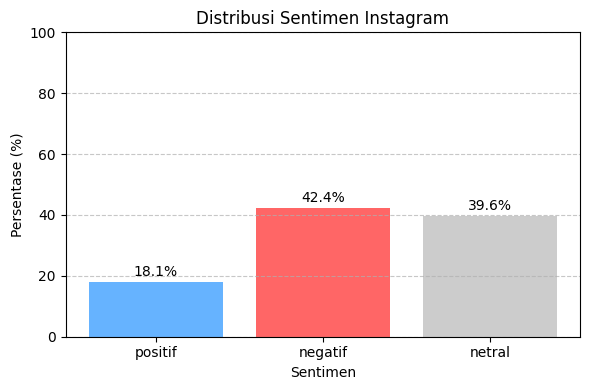

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah sentimen positif, negatif, dan netral (sertakan semua meskipun nol)
sentiment_counts = df['sentiment'].value_counts().reindex(['positif', 'negatif', 'netral'], fill_value=0)

# Hitung persentase
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# Warna-warna untuk tiap label
colors = ['#66b3ff', '#ff6666', '#cccccc']  # Biru untuk positif, merah untuk negatif, abu untuk netral

# Buat bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(sentiment_percentages.index, sentiment_percentages.values, color=colors)

# Tambahkan label persentase di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

plt.title('Distribusi Sentimen Instagram')
plt.xlabel('Sentimen')
plt.ylabel('Persentase (%)')
plt.ylim(0, 100)  # agar sumbu y selalu maksimal 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<h1><u>PROSES MODEL TOPIK LDA</u></h1>

In [ ]:
!pip install --upgrade gensim==4.3.2 scipy==1.10.1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Label unik : ['netral' 'negatif' 'positif']
sentiment
negatif    649
netral     606
positif    277
Name: Jumlah per label, dtype: int64

📊 Nilai Koherensi (Positif)
------------------------------
Topik 2: 0.4111
Topik 3: 0.4135
Topik 4: 0.4231
Topik 5: 0.4514

📊 Nilai Koherensi (Negatif)
------------------------------
Topik 2: 0.4704
Topik 3: 0.4764
Topik 4: 0.4929
Topik 5: 0.4999


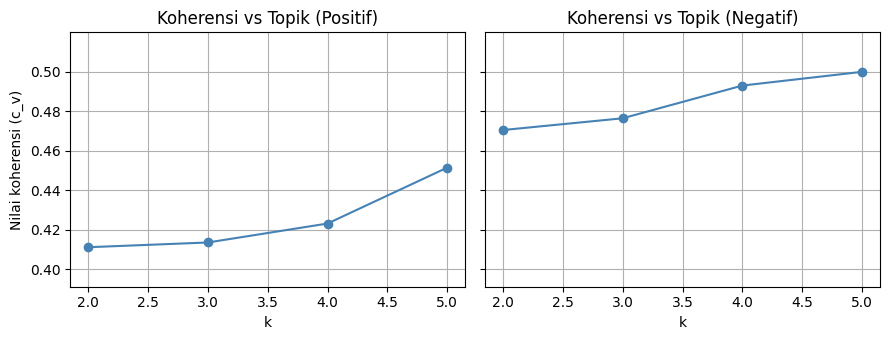

===== NILAI BOBOT KATA TERATAS PER TOPIK =====

===== POSITIF =====
Topik 1            Topik 2          Topik 3         Topik 4         Topik 5           
pertamax (0.0724)  aman (0.2427)    ribet (0.0680)  aman (0.0691)   pertalite (0.1137)
bbm (0.0592)       beat (0.0821)    pakai (0.0658)  shell (0.0362)  motor (0.1067)    
subsidi (0.0557)   untung (0.0288)  bikin (0.0467)  pakai (0.0356)  pakai (0.0636)    

===== NEGATIF =====
Topik 1           Topik 2             Topik 3            Topik 4             Topik 5       
bbm (0.0898)      pakai (0.1647)      pertamax (0.0921)  motor (0.1460)      aman (0.1012) 
subsidi (0.0858)  pertalite (0.0710)  rakyat (0.0619)    pertalite (0.0799)  shell (0.0827)
negara (0.0575)   maaf (0.0383)       beli (0.0326)      thunder (0.0589)    beat (0.0672) 


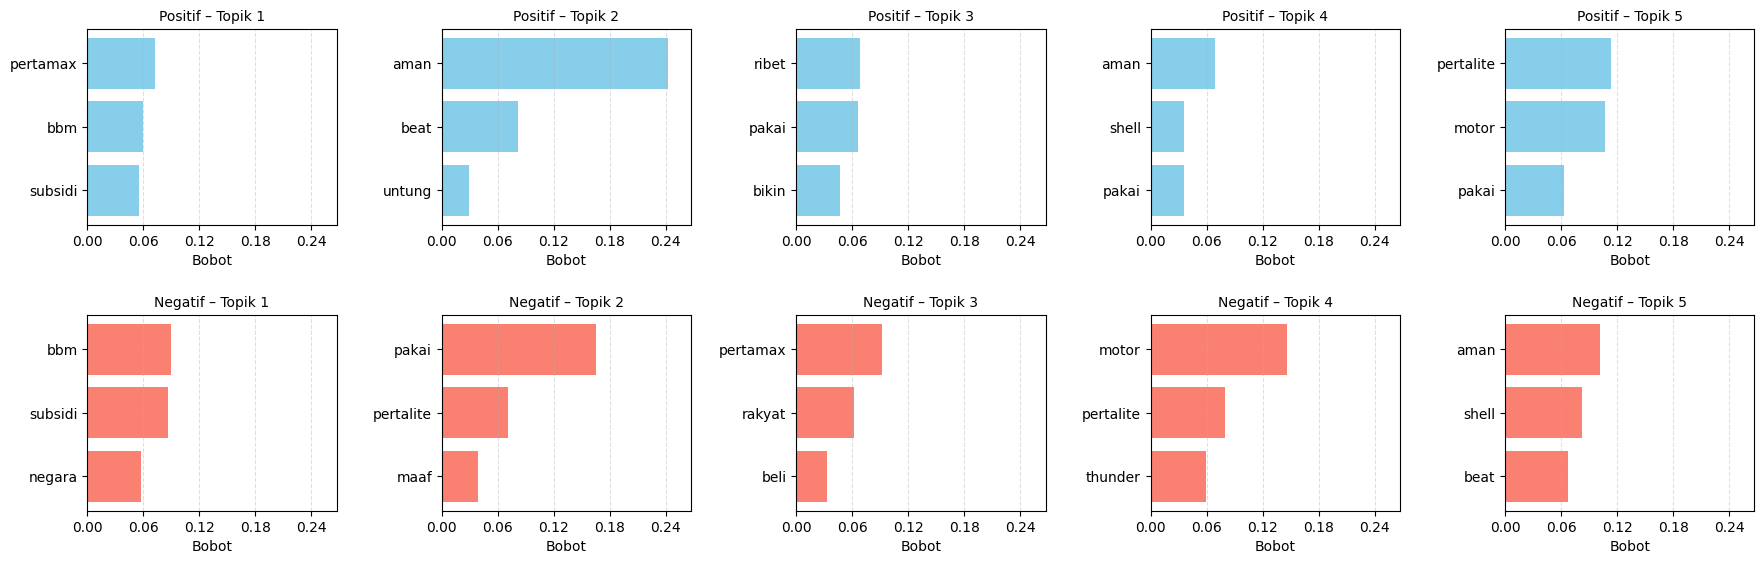

File 'hasil_topik_dominan_instagram.csv' berhasil disimpan.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # Untuk visualisasi grafik
import numpy as np # Untuk perhitungan numerik
import nltk, warnings  # Untuk NLP dan manajemen warning
from gensim import corpora # Untuk membuat dictionary
from gensim.models import LdaModel, CoherenceModel  # Untuk LDA dan evaluasi koherensi
from nltk.corpus import stopwords # Untuk stopwords Bahasa Indonesia

nltk.download('stopwords')
warnings.filterwarnings("ignore", category=DeprecationWarning)

# ======== LOAD DATA & TOKENIZING ========
FILE = "hasil_analisis_sentimen_instagram.csv"
df = pd.read_csv(FILE)
df['tokens'] = df['stopword_removal'].apply(eval)

print("Label unik :", df['sentiment'].unique())
print(df['sentiment'].value_counts().rename("Jumlah per label"))
df.head()

# ======== FILTER POSITIF & NEGATIF ========
df_pos = df[df['sentiment'] == 'positif'].copy()
df_neg = df[df['sentiment'] == 'negatif'].copy()

stop_words = set(stopwords.words('indonesian'))
stop_words.update({'nya','aja','dong','isi','sih','ya','deh','mah','h'})

def clean_tokens(series):
    return [[w for w in doc if w not in stop_words] for doc in series]

clean_pos = clean_tokens(df_pos['tokens'])
clean_neg = clean_tokens(df_neg['tokens'])

# ======== FUNGSI MEMBANGUN CORPUS DAN LDA ========
def build_corpus(texts):
    dictionary = corpora.Dictionary(texts) # Buat kamus dari teks
    dictionary.filter_extremes(no_below=3, no_above=0.7) # Filter kata terlalu umum/asing
    corpus = [dictionary.doc2bow(t) for t in texts] # Konversi dokumen jadi bag-of-words
    return corpus, dictionary

# ======== HITUNG NILAI KOHERENSI UNTUK MENENTUKAN JUMLAH TOPIK OPTIMAL (tertinggi) ========
def coherence_scores(cleaned, label=""):
    corpus, dictionary = build_corpus(cleaned)
    ks = range(2, 6) # Rentang jumlah topik yang akan diuji
    out = []

    print(f"\n📊 Nilai Koherensi ({label})")
    print("-" * 30)
    for k in ks:
        lda = LdaModel(corpus=corpus, id2word=dictionary,
                       num_topics=k, passes=10, random_state=42) # LDA model dengan k topik
        cv = CoherenceModel(model=lda, texts=cleaned,
                            dictionary=dictionary, coherence='c_v').get_coherence() # Hitung nilai koherensi
        print(f"Topik {k}: {cv:.4f}")
        out.append((k, cv))
    return out

# Koherensi untuk masing-masing sentimen
scores_pos = coherence_scores(clean_pos, label="Positif")
scores_neg = coherence_scores(clean_neg, label="Negatif")

# Ambil nilai koherensi dan jumlah topik untuk plot
(ks_pos, cv_pos), (ks_neg, cv_neg) = zip(*scores_pos), zip(*scores_neg)

# ======== PLOT NILAI KOHERENSI UNTUK POSITIF DAN NEGATIF ========
ymin = min(min(cv_pos), min(cv_neg)) - 0.02
ymax = max(max(cv_pos), max(cv_neg)) + 0.02

fig, ax = plt.subplots(1, 2, figsize=(9, 3.5), sharey=True)
for a, (ks, cvs, lbl) in zip(ax, [(ks_pos, cv_pos, "Positif"),
                                  (ks_neg, cv_neg, "Negatif")]):
    a.plot(ks, cvs, marker='o', color='steelblue')
    a.set_title(f"Koherensi vs Topik ({lbl})")
    a.set_xlabel("k")
    a.grid(True)
    a.set_ylim(ymin, ymax)
ax[0].set_ylabel("Nilai koherensi (c_v)")
plt.tight_layout()
plt.show()

# ======== LATIH MODEL FINAL DENGAN JUMLAH TOPIK TERPILIH ========
def train_lda(cleaned, k=5):
    corpus, dictionary = build_corpus(cleaned)
    return LdaModel(corpus=corpus, id2word=dictionary,
                    num_topics=k, passes=20, alpha='auto',
                    random_state=42) # Training model akhir LDA

lda_pos = train_lda(clean_pos, k=5)
lda_neg = train_lda(clean_neg, k=5)

# ======== AMBIL KATA DAN BOBOT UNTUK TIAP TOPIK ========
def topic_words(lda, topn=3):
    return [[w for w,_ in lda.show_topic(i, topn=topn)] for i in range(lda.num_topics)] # kata-kata teratas

def topic_weights(lda, topn=3):
    return [[w for _,w in lda.show_topic(i, topn=topn)] for i in range(lda.num_topics)] # bobot kata

twords_pos, tweights_pos = topic_words(lda_pos), topic_weights(lda_pos)
twords_neg, tweights_neg = topic_words(lda_neg), topic_weights(lda_neg)

# ======== CETAK NILAI BOBOT KATA TERATAS PER TOPIK ========
def print_bobot_horizontal(words_list, weights_list, label):
    n_topic = len(words_list)
    topn = len(words_list[0])
    cells = [[f"{words_list[col][row]} ({weights_list[col][row]:.4f})"
              for col in range(n_topic)]
             for row in range(topn)]
    col_widths = [max(len(cells[row][col]) for row in range(topn))
                  for col in range(n_topic)]

    print(f"\n===== {label.upper()} =====")
    header = [f"Topik {i+1}".ljust(col_widths[i]) for i in range(n_topic)]
    print("  ".join(header))

    for row in range(topn):
        line = [cells[row][col].ljust(col_widths[col]) for col in range(n_topic)]
        print("  ".join(line))

print("===== NILAI BOBOT KATA TERATAS PER TOPIK =====")
print_bobot_horizontal(twords_pos, tweights_pos, "positif")
print_bobot_horizontal(twords_neg, tweights_neg, "negatif")

# ======== GRAFIK BATANG PER TOPIK ========
fig, axes = plt.subplots(2, 5, figsize=(18, 6), sharex=True)

x_max = 1.1 * max(max(map(max, tweights_pos)), max(map(max, tweights_neg)))

def plot_topic(ax, words, weights, title, color, show_xtick=True):
    ax.barh(words, weights, color=color)
    ax.invert_yaxis()
    ax.set_title(title, fontsize=10)
    ax.set_xlim(0, x_max)
    ax.set_xlabel("Bobot")
    ax.grid(axis='x', linestyle='--', alpha=.4)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    if show_xtick:
        ax.tick_params(labelbottom=True)

for i in range(5):
    plot_topic(axes[0, i], twords_pos[i], tweights_pos[i], f"Positif – Topik {i+1}", "skyblue")
    plot_topic(axes[1, i], twords_neg[i], tweights_neg[i], f"Negatif – Topik {i+1}", "salmon")

plt.tight_layout(pad=2)
plt.show()

# ======== SIMPAN TOPIK DOMINAN DAN 3 KATA KE CSV ========
def get_topic_distributions(lda_model, corpus):
    return [max(lda_model.get_document_topics(doc), key=lambda x: x[1])[0] for doc in corpus] # Topik dominan

corpus_pos, _ = build_corpus(clean_pos)
df_pos['topik_dominan'] = get_topic_distributions(lda_pos, corpus_pos)

corpus_neg, _ = build_corpus(clean_neg)
df_neg['topik_dominan'] = get_topic_distributions(lda_neg, corpus_neg)

def topik_ke_kata_teratas(twords):
    return {i: ', '.join(twords[i]) for i in range(len(twords))}

map_kata_pos = topik_ke_kata_teratas(twords_pos)
map_kata_neg = topik_ke_kata_teratas(twords_neg)

df_pos['kata_3_teratas'] = df_pos['topik_dominan'].map(map_kata_pos)
df_neg['kata_3_teratas'] = df_neg['topik_dominan'].map(map_kata_neg)

kolom_output = ['sentiment', 'hasil_normalisasi', 'topik_dominan', 'kata_3_teratas']
df_gabungan = pd.concat([df_pos[kolom_output], df_neg[kolom_output]], ignore_index=True)

df_gabungan.to_csv("hasil_topik_dominan_instagram.csv", index=False, encoding='utf-8-sig')
print("File 'hasil_topik_dominan_instagram.csv' berhasil disimpan.")

<h1><U>PROSES SUMMERIZE MENGGUNAKAN LEXRANK</U></h1>


In [ ]:
!pip install lexrank
!pip install sumy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.6 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21693 sha256=1266657d63a16a4911f184706a2d3c85a560f38e2a90d2516b975c0c9b6ce5f8
  Stored in directory: /root/.cache/pip/wheels/4d/57/58/7e3d7fedf51fe248b7fcee3df6945ae28638e22cddf01eb92b
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=27a6066ae09f18a42271abd0a15068a19454ba81cf1e9dece3c96da520c44397
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built breadability docopt


In [ ]:
import pandas as pd
from lexrank import LexRank
from lexrank.mappings.stopwords import STOPWORDS
import re

# ======== BACA CSV ========
df = pd.read_csv("hasil_topik_dominan_instagram.csv")
df['hasil_normalisasi'] = df['hasil_normalisasi'].astype(str)
df['kata_3_teratas']    = df['kata_3_teratas'].astype(str)

def ringkasan_lexrank_per_topik(df_all, sentiment_label, n_topik_target=5):
    """
    Menghasilkan ringkasan LexRank per topik (default 5 topik).
    """
    hasil  = []
    # Filter berdasarkan label sentimen
    df_lab = df_all[df_all['sentiment'].str.lower() == sentiment_label.lower()]
    # Ambil ID topik unik, lalu potong sesuai n_topik_target
    topik_ids = sorted(df_lab['topik_dominan'].unique())[:n_topik_target]

    for topik in topik_ids:
        topik_df     = df_lab[df_lab['topik_dominan'] == topik]
        kalimat_list = topik_df['hasil_normalisasi'].dropna().unique().tolist()

        # ------ Tangani jika tidak ada kalimat ------
        if not kalimat_list:
            hasil.append({
                'Topik': f"{sentiment_label.title()} – Topik {topik+1}",
                'Kata Kunci': "-",
                'Ringkasan': "Tidak ada kalimat relevan."
            })
            continue

        # ------ Kata kunci (3 teratas) ------
        kata_kunci_str = topik_df['kata_3_teratas'].dropna().values[0]
        kata_kunci     = [k.strip().lower() for k in kata_kunci_str.split(',')]

        # Pilih kalimat yang mengandung ≥ 2 kata kunci
        def cocok(kal):
            tokens = re.findall(r"\w+", kal.lower())
            return sum(k in tokens for k in kata_kunci) >= 2

        kal_relevan = list(filter(cocok, kalimat_list))

        # ------ Ringkas dengan LexRank ------
        if len(kal_relevan) >= 2:
            docs = [[w for w in kal.split()] for kal in kal_relevan]
            lxr  = LexRank(docs, stopwords=STOPWORDS['en'])
            ringkas  = lxr.get_summary(kal_relevan, summary_size=3, threshold=0.1)
            ringkasan = " ".join(ringkas)
        elif kal_relevan:
            ringkasan = kal_relevan[0]
        else:
            ringkasan = "Tidak ada kalimat relevan."

        hasil.append({
            "Topik":     f"{sentiment_label.title()} – Topik {topik+1}",
            "Kata Kunci":", ".join(kata_kunci),
            "Ringkasan": ringkasan
        })

    return hasil

# ======== PROSES: 5 topik positif & 5 topik negatif ========
hasil_pos = ringkasan_lexrank_per_topik(df, "positif", n_topik_target=5)
hasil_neg = ringkasan_lexrank_per_topik(df, "negatif", n_topik_target=5)

df_hasil = pd.DataFrame(hasil_pos + hasil_neg)

# ======== TAMPILKAN ========
print("\n📌 RINGKASAN PER TOPIK:")
for _, row in df_hasil.iterrows():
    print(f"\n📄 {row['Topik']}")
    print(f"Kata Kunci: {row['Kata Kunci']}")
    print(f"Ringkasan: {row['Ringkasan']}")

# ======== SIMPAN CSV ========
df_hasil.to_csv("hasil_ringkasan_lexrank_per_topik.csv",
                index=False, encoding="utf-8-sig")
print("\n✅ File disimpan sebagai 'hasil_ringkasan_lexrank_per_topik.csv'")



📌 RINGKASAN PER TOPIK:

📄 Positif – Topik 1
Kata Kunci: pertamax, bbm, subsidi
Ringkasan: scoopy pakai pertalite dulu zaman saya masih ada supra cc selalu minum premium sebelum premium dihapus tarikan sangat enak pas saya isi pertamax tarikan berat begitu buka gas besar motor tidak ngejambak tenaganya untung nya motor karbu jadi ada kesan untuk pembersihan tapi jangan sering dipaksa pakai oktan tinggi wkwkwk motor injeksi alangkah baiknya pakai bbm yang menyesuaikan dengan kompresi mesin pada motor tersebut ya malas  juga isi bbm subsidi kalau lihat dari komenternyata masyarakat indonesia seperti alhamdulillah dari kemarin aja harusnya bbm jangan subsidi

📄 Positif – Topik 2
Kata Kunci: aman, beat, untung
Ringkasan: untung saya punya nya beat tidak beat tidak manis wkkk aman lah beat mber aku tidak termasuk beat karbu aman lah ya

📄 Positif – Topik 3
Kata Kunci: ribet, pakai, bikin
Ringkasan: bahaya nya yang seperti bagaimana ini kan mempermudah enak pakai qr tidak ribet juga lebih se